In [44]:
import pandas as pd
import numpy as np

In [10]:
df_small = pd.read_csv ('data/Ames_Housing_Price_Data.csv')
df_big = pd.read_csv ('data/Ames_Real_Estate_Data.csv')

In [87]:
#Dividing lot area into bins of interval size of 1000. (Max - min)/1000 = 214 bins
df_small['lot_bucket'] = pd.cut(df_small['LotArea'],214)

mean_lf = df_small.groupby('lot_bucket').agg({'LotFrontage': np.mean}, ignorena = True)
data_new = pd.merge(df_small, mean_lf, on = 'lot_bucket', how = 'left')
data_new.rename(columns = {'LotFrontage_x':'LotFrontage', 'LotFrontage_y':'mean_LotFrontage'}, inplace = True)
# data_new

KeyError: (0, 1)

In [ ]:

# data_new = pd.merge(data, mean_lf, on = 'lot_bucket', how = 'left')
# data_new.rename(columns = {'LotFrontage_x':'LotFrontage', 'LotFrontage_y':'mean_LotFrontage'}, inplace = True)
# data_new.apply(lambda x: print(x['mean_LotFrontage']) if x['LotFrontage'].isna() == True else x['LotFrontage'])
# data_new

(2.0, 320.0)

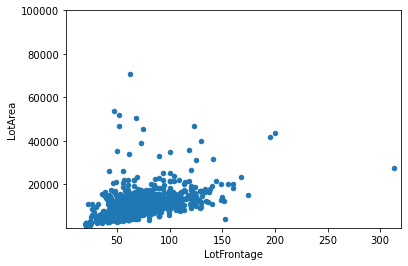

In [90]:
scatterp = df_small.plot.scatter(x='LotFrontage',y='LotArea', colormap='viridis')
scatterp.set_ylim(2,100000)
scatterp.set_xlim(2,320)


In [62]:
df_merged = df_small.merge(df_big, left_on='PID', right_on='MapRefNo', how='left')
df_merged.to_csv('merged_data.csv')

In [57]:
df_merged[df_merged.duplicated(['PID'], keep=False)].head(50)
                                                    

,Unnamed: 0,PID,GrLivArea,SalePrice_x,MSSubClass,MSZoning,LotFrontage,LotArea_x,Street,Alley,...,PA-Nmbr,PA-PreD,PA-Strt,PA-StSfx,PA-PostD,PA-UnTyp,PA-UntNo,Date,Source,NmbrBRs
1,2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,...,3416,NaN,WEST,ST,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,2.0
2,2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,...,3416,NaN,WEST,ST,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,2.0
38,38,902206020,492,61500,30,RM,52.0,7830,Pave,NaN,...,118.0,E,11TH,ST,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,1.0
39,38,902206020,492,61500,30,RM,52.0,7830,Pave,NaN,...,118.0,E,11TH,ST,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,1.0
41,40,527455250,988,129250,20,RL,65.0,7150,Pave,NaN,...,1115.0,NaN,28TH,ST,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,3.0
42,40,527455250,988,129250,20,RL,65.0,7150,Pave,NaN,...,1115.0,NaN,28TH,ST,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,3.0
44,42,914452190,1080,134000,20,RL,71.0,9187,Pave,NaN,...,302,NaN,OPAL,CIR,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,3.0
45,42,914452190,1080,134000,20,RL,71.0,9187,Pave,NaN,...,302,NaN,OPAL,CIR,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,3.0
47,44,532376250,925,133500,20,RL,NaN,8638,Pave,NaN,...,4015.0,NaN,TORONTO,ST,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,2.0
48,44,532376250,925,133500,20,RL,NaN,8638,Pave,NaN,...,4015.0,NaN,TORONTO,ST,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,2.0


In [58]:
df_merged.sort_values('PID', ascending=True)

,Unnamed: 0,PID,GrLivArea,SalePrice_x,MSSubClass,MSZoning,LotFrontage,LotArea_x,Street,Alley,...,PA-Nmbr,PA-PreD,PA-Strt,PA-StSfx,PA-PostD,PA-UnTyp,PA-UntNo,Date,Source,NmbrBRs
1245,224,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,...,3126.0,NaN,NORTHWOOD,DR,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,3.0
328,323,526302030,1293,149900,20,RL,NaN,11027,Pave,NaN,...,3115.0,NaN,NORTHWOOD,DR,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,2.0
910,898,526302040,1024,157500,20,RL,85.0,10533,Pave,NaN,...,3113.0,NaN,NORTHWOOD,DR,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,2.0
2275,423,526302110,882,124500,20,RL,74.0,13008,Pave,NaN,...,623.0,NaN,RIVER OAK,DR,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,2.0
548,542,526302120,1797,169000,20,RL,NaN,11765,Pave,NaN,...,627.0,NaN,RIVER OAK,DR,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,768,924100070,1389,170000,20,RL,77.0,10010,Pave,NaN,...,3508,NaN,JEWEL,DR,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,2.0
483,477,924151040,1803,285000,20,RL,76.0,9892,Pave,NaN,...,3616,NaN,JEWEL,DR,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,3.0
2131,281,924151050,2000,188000,60,RL,74.0,9627,Pave,NaN,...,3702,NaN,JEWEL,DR,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,3.0
654,648,924152030,1797,231000,60,RL,74.0,12961,Pave,NaN,...,3715,NaN,JEWEL,DR,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,3.0
